In [18]:
#Parth Parashar 2110110368
#Vansh Maheshwari 2110110584

In [ ]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.chunk import RegexpParser
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Path to your folder containing text files
folder_path = "/content/drive/MyDrive/cart_clinical_trials"

file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.txt')]
documents = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        text = file.read()
        documents.append(text)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) if get_wordnet_pos(pos) else lemmatizer.lemmatize(word) for word, pos in pos_tags]
    return ' '.join(lemmatized_words)

preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Phrase Chunking
def phrase_chunking(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    grammar = r"NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(grammar)
    chunks = chunk_parser.parse(pos_tags)
    return chunks

chunked_documents = [phrase_chunking(doc) for doc in preprocessed_documents]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Clustering - KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_

# Evaluate clustering
silhouette_avg = silhouette_score(tfidf_matrix, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Bag of Words representation (if needed)
bag_of_words = tfidf_vectorizer.transform(preprocessed_documents)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14123621460125838


In [ ]:
bag_of_words

<47x14548 sparse matrix of type '<class 'numpy.float64'>'
	with 36869 stored elements in Compressed Sparse Row format>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-50:]
tfidf_matrix = tfidf_matrix[:, columns_to_keep]

# Clustering - KMeans
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_

# Evaluate clustering
silhouette_avg = silhouette_score(tfidf_matrix, clusters)
print(f"Silhouette Score: {silhouette_avg}")

bag_of_words = tfidf_vectorizer.transform(preprocessed_documents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.26964172388378693


In [ ]:
cluster_range = range(2, 15)

# Iterate over different numbers of clusters
for num_clusters in cluster_range:
    # Clustering - KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = kmeans.labels_

    # Evaluate clustering
    silhouette_avg = silhouette_score(tfidf_matrix, clusters)
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 2, Silhouette Score: 0.20612311761116167
Number of clusters: 3, Silhouette Score: 0.23536210723009687
Number of clusters: 4, Silhouette Score: 0.23350547074499053
Number of clusters: 5, Silhouette Score: 0.24550024741830218
Number of clusters: 6, Silhouette Score: 0.2625568460764077
Number of clusters: 7, Silhouette Score: 0.2630510668949115
Number of clusters: 8, Silhouette Score: 0.28115797195807374


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette Score: 0.26123888877322937
Number of clusters: 10, Silhouette Score: 0.2686770568230613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 11, Silhouette Score: 0.30108541627614305
Number of clusters: 12, Silhouette Score: 0.33251181986971684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 13, Silhouette Score: 0.327510300987174
Number of clusters: 14, Silhouette Score: 0.34378379789119584


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_range = range(15, 30)

# Iterate over different numbers of clusters
for num_clusters in cluster_range:
    # Clustering - KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = kmeans.labels_

    # Evaluate clustering
    silhouette_avg = silhouette_score(tfidf_matrix, clusters)
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 15, Silhouette Score: 0.350840925856957
Number of clusters: 16, Silhouette Score: 0.3570145844688959


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 17, Silhouette Score: 0.35620178230053917
Number of clusters: 18, Silhouette Score: 0.37155173785760387
Number of clusters: 19, Silhouette Score: 0.3559084224572604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 20, Silhouette Score: 0.37088774059851837


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 21, Silhouette Score: 0.3478860720460419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 22, Silhouette Score: 0.36783892221016334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 23, Silhouette Score: 0.3381980080503524


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 24, Silhouette Score: 0.34714922478286053


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 25, Silhouette Score: 0.37019314655719604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 26, Silhouette Score: 0.3510919521952351


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 27, Silhouette Score: 0.3605160251197903


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 28, Silhouette Score: 0.3490360817425032


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 29, Silhouette Score: 0.33989517205857606


In [12]:
cardinality_range = range(10, 101, 5)

# Iterate over different cardinality values
for max_cardinality in cardinality_range:
    # Remove columns with cardinality more than max_cardinality
    columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-max_cardinality:]
    tfidf_matrix_subset = tfidf_matrix[:, columns_to_keep]

    # Clustering - KMeans
    num_clusters = 17
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix_subset)
    clusters = kmeans.labels_

    # Evaluate clustering
    silhouette_avg = silhouette_score(tfidf_matrix_subset, clusters)
    print(f"Max Cardinality: {max_cardinality}, Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 10, Silhouette Score: 0.5090573632246568
Max Cardinality: 15, Silhouette Score: 0.4435732900317212


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 20, Silhouette Score: 0.417182386533647
Max Cardinality: 25, Silhouette Score: 0.42144554339388185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 30, Silhouette Score: 0.401447592682139
Max Cardinality: 35, Silhouette Score: 0.3915844724909753


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 40, Silhouette Score: 0.4008851698479712
Max Cardinality: 45, Silhouette Score: 0.3785558508647291


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 50, Silhouette Score: 0.35982700476438156
Max Cardinality: 55, Silhouette Score: 0.3556741338743144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 60, Silhouette Score: 0.3542562562976472
Max Cardinality: 65, Silhouette Score: 0.347611583808147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 70, Silhouette Score: 0.3554421281282883
Max Cardinality: 75, Silhouette Score: 0.36181311464746835


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 80, Silhouette Score: 0.3457439081303963
Max Cardinality: 85, Silhouette Score: 0.368933902963761


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 90, Silhouette Score: 0.3607449291646097
Max Cardinality: 95, Silhouette Score: 0.35862266475905924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Cardinality: 100, Silhouette Score: 0.368933902963761


In [ ]:
columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-100:]

len(columns_to_keep)

50

Number of Clusters: 17
Best Silhouette Score: 0.5081973591778621 at Cardinality: 10
Best CH Index: 43.37292446492048 at Cardinality: 10
Best Stability Score: 0.676360962745245 at Cardinality: 50


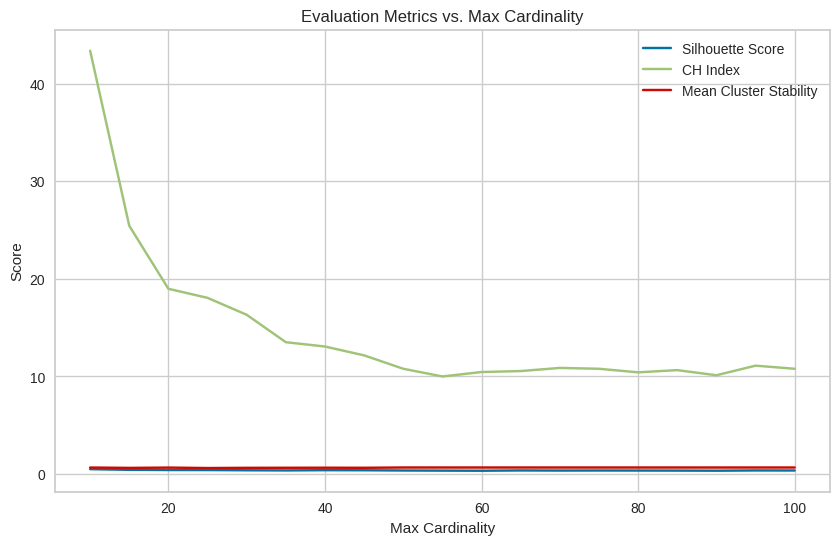

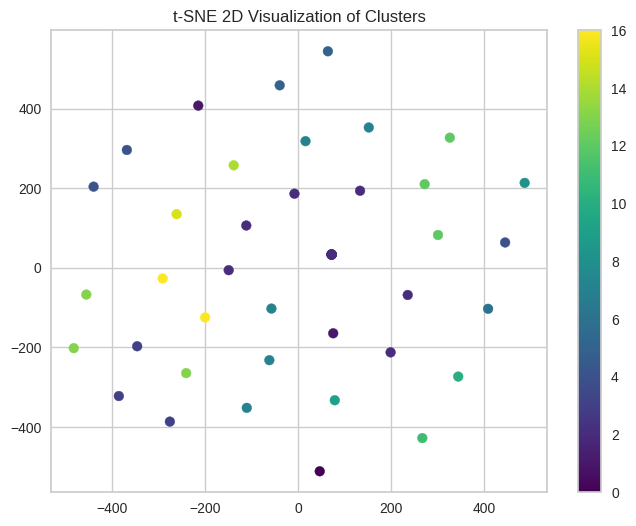

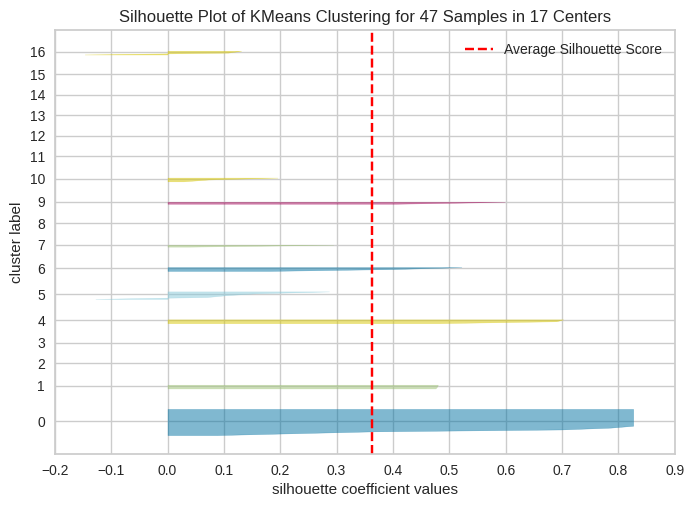

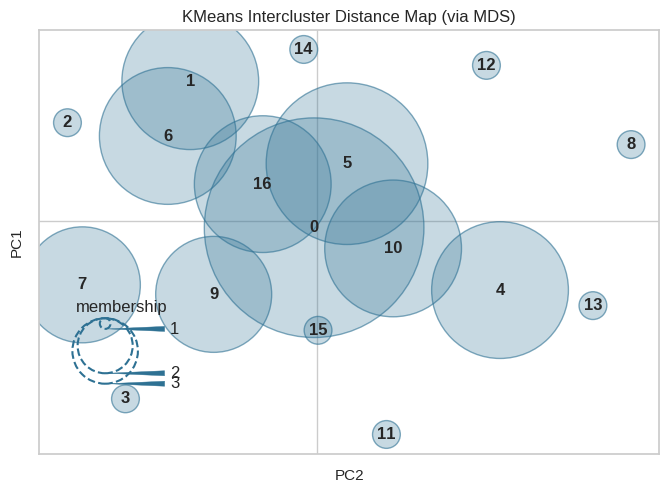

In [15]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from yellowbrick.cluster import silhouette_visualizer, intercluster_distance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

cardinality_range = range(10, 101, 5)

silhouette_scores = []
ch_scores = []
stability_scores = []
pca_2d_scores = []
pca_3d_scores = []
wordcloud_texts = []
silhouette_scores = []
ch_scores = []
stability_scores = []

# Iterate over different cardinality values
for max_cardinality in cardinality_range:
    columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-max_cardinality:]
    tfidf_matrix_subset = tfidf_matrix[:, columns_to_keep]

    # Clustering - KMeans
    num_clusters = 17
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix_subset)
    clusters = kmeans.labels_

    # Evaluate clustering - Silhouette Score
    silhouette_avg = silhouette_score(tfidf_matrix_subset, clusters)
    silhouette_scores.append(silhouette_avg)

    # Evaluate clustering - CH Index
    ch_index = calinski_harabasz_score(tfidf_matrix_subset.toarray(), clusters)
    ch_scores.append(ch_index)

    # Evaluate clustering - Mean Cluster Stability
    n_bootstraps = 100
    stability_samples = []
    for _ in range(n_bootstraps):
        data_resampled = resample(tfidf_matrix_subset, replace=True, random_state=42)
        kmeans_resampled = KMeans(n_clusters=num_clusters)
        clusters_resampled = kmeans_resampled.fit_predict(data_resampled)
        stability_samples.append(silhouette_score(data_resampled, clusters_resampled))
    stability_avg = np.mean(stability_samples)
    stability_scores.append(stability_avg)

# Find the best scores and their respective cardinalities
best_silhouette_score = max(silhouette_scores)
best_silhouette_cardinality = cardinality_range[silhouette_scores.index(best_silhouette_score)]

best_ch_score = max(ch_scores)
best_ch_cardinality = cardinality_range[ch_scores.index(best_ch_score)]

best_stability_score = max(stability_scores)
best_stability_cardinality = cardinality_range[stability_scores.index(best_stability_score)]
print(f"Number of Clusters: {num_clusters}")
print(f"Best Silhouette Score: {best_silhouette_score} at Cardinality: {best_silhouette_cardinality}")
print(f"Best CH Index: {best_ch_score} at Cardinality: {best_ch_cardinality}")
print(f"Best Stability Score: {best_stability_score} at Cardinality: {best_stability_cardinality}")


plt.figure(figsize=(10, 6))
plt.plot(cardinality_range, silhouette_scores, label='Silhouette Score')
plt.plot(cardinality_range, ch_scores, label='CH Index')
plt.plot(cardinality_range, stability_scores, label='Mean Cluster Stability')
plt.xlabel('Max Cardinality')
plt.ylabel('Score')
plt.legend()
plt.title('Evaluation Metrics vs. Max Cardinality')
plt.show()

# PCA 2D Visualization
for pca_2d in pca_2d_scores:
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters, cmap='viridis')
    plt.title('PCA 2D Visualization of Clusters')
    plt.colorbar()
    plt.show()

# PCA 3D Visualization
for pca_3d in pca_3d_scores:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=clusters, cmap='viridis')
    ax.set_title('PCA 3D Visualization of Clusters')
    plt.show()

# Word Cloud
for wordcloud_text in wordcloud_texts:
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_text, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tfidf_embedded_2d = tsne.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(tfidf_embedded_2d[:, 0], tfidf_embedded_2d[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE 2D Visualization of Clusters')
plt.colorbar()
plt.show()

# Silhouette Plot
silhouette_visualizer(KMeans(n_clusters=num_clusters, random_state=42), tfidf_matrix, colors='yellowbrick')

# Inter-cluster Distance Plot
intercluster_distance(KMeans(n_clusters=num_clusters, random_state=42), tfidf_matrix, colors='yellowbrick')


plt.show()


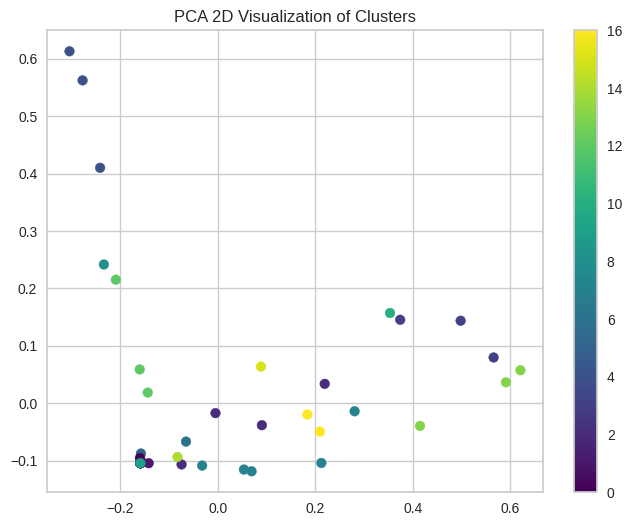

In [16]:
columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-best_silhouette_cardinality:]
tfidf_matrix_subset = tfidf_matrix[:, columns_to_keep]
pca = PCA(n_components=2)
tfidf_pca_2d = pca.fit_transform(tfidf_matrix_subset.toarray())

# Visualize PCA 2D
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_pca_2d[:, 0], tfidf_pca_2d[:, 1], c=clusters, cmap='viridis')
plt.title('PCA 2D Visualization of Clusters')
plt.colorbar()
plt.show()

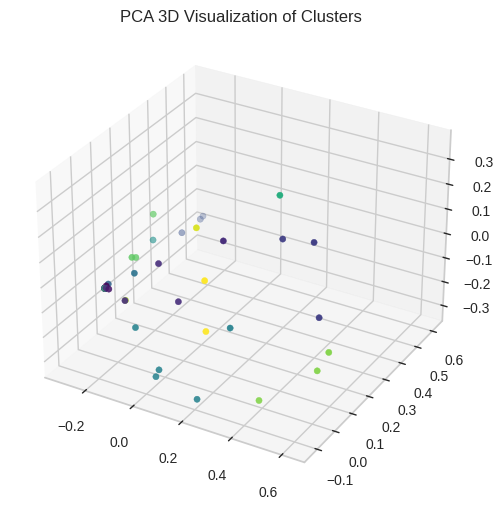

In [17]:
columns_to_keep = tfidf_matrix.sum(axis=0).A1.argsort()[-best_silhouette_cardinality:]
tfidf_matrix_subset = tfidf_matrix[:, columns_to_keep]
pca = PCA(n_components=3)
tfidf_pca_3d = pca.fit_transform(tfidf_matrix_subset.toarray())

# Visualize PCA 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tfidf_pca_3d[:, 0], tfidf_pca_3d[:, 1], tfidf_pca_3d[:, 2], c=clusters, cmap='viridis')
ax.set_title('PCA 3D Visualization of Clusters')
plt.show()